

# Movies data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this report , I will analyze a movie dataset to explore the that influence a movies success. And I will attemp to answer the following questions:
- How has the popularity of different movie genres changed over the years based on revenue and ratings?

- Which production company has the most popularity, revenue, and vote average?
- Which movie genres generate the highest revenue and receive the highest audience ratings?
- Which movies have the highest revenue, rating, and vote average in each genre?



In [47]:
# here i import the libraries that i will use in the project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [48]:
def add_title_and_labels(title, xlabel, ylabel) :
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [49]:
# thic code to check the outliers in the budget column by using the boxplot 
def boxplot():
    plt.figure(figsize=(8,6))  
    plt.show()

In [50]:
df = pd.read_csv("tmdb-movies.csv")
# this code to setup a Backup for the data
df_backup = df.copy()
# this code to show the first 5 rows of the data
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [51]:
# this code to show the data types of the columns
df.dtypes


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [52]:
# this code to show the number of rows and columns in the data
df.shape

(10866, 21)

from the informations that i know from the pervious code that
the dataset is formed by 10866 rows and 21 columns
 

First search for the null values and calculate it

In [53]:
# this code find and calculate the null values
print(df.isnull().sum())
# this code to detect is there any zeors values in the columns

print("vote_count : " , df[df["vote_count"] == 0].shape[0])
print("vote_average : " , df[df["vote_average"] == 0].shape[0])
print("release_year : " , df[df["release_year"] == 0].shape[0])
print("popularity : " , df[df["popularity"] == 0].shape[0])

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64
vote_count :  0
vote_average :  0
release_year :  0
popularity :  0


From the informations that i know from the pervious code  that
the 
- director column has 44 null values

- genres collumn has 23 null values 
- production_companies column has 1030 null values
- keywords column has 1493 null values
- cast column has 76 null values
- vote_count ,vote_average, release_year, revenue, budget, popularity and runtime columns have 0 null values 

And other columns i don't need it so i will not focues on it 

And i saw that many values in differnt columns are 0 such as

budget has 5696 zero values

revenue has 6016 zero values

runtime  has 31 zero values

Second search for the duplicate values and calculate it

In [54]:
# this code find and calculate the duplicated columns
print(df.duplicated().sum())
# this code to show the duplicated column
df[df.duplicated()]


1


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [55]:
# this code to show the duplicated column with the real one 
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


From the informations that i know from the pervious code that the duplicated values are 1 

Third find the outlires in the data

In [56]:
import pandas as pd

# Define the columns to check for outliers
columns_to_check = ["budget", "popularity", "revenue", "vote_average", "vote_count"]

# Dictionary to store outliers for each column
outliers_dict = {}

for column in columns_to_check:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the interquartile range (IQR)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Store the number of outliers
    outliers_dict[column] = outliers.shape[0]

    print(f"Outliers found in {column}: {outliers.shape[0]}")

# Display a summary of outliers in all columns
print("\nOutliers summary:")
print(outliers_dict)


Outliers found in budget: 1370
Outliers found in popularity: 946
Outliers found in revenue: 1736
Outliers found in vote_average: 197
Outliers found in vote_count: 1518

Outliers summary:
{'budget': 1370, 'popularity': 946, 'revenue': 1736, 'vote_average': 197, 'vote_count': 1518}


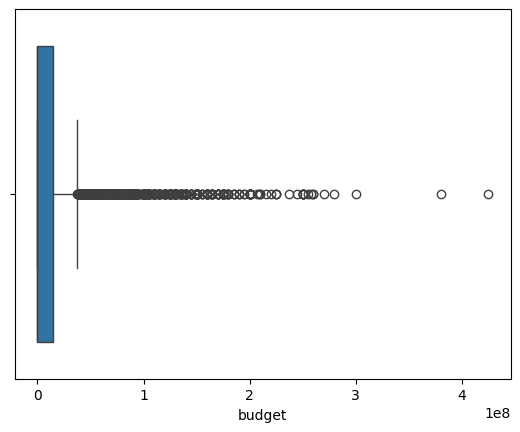

<Figure size 800x600 with 0 Axes>

In [57]:
sns.boxplot(x=df["budget"])  
boxplot()


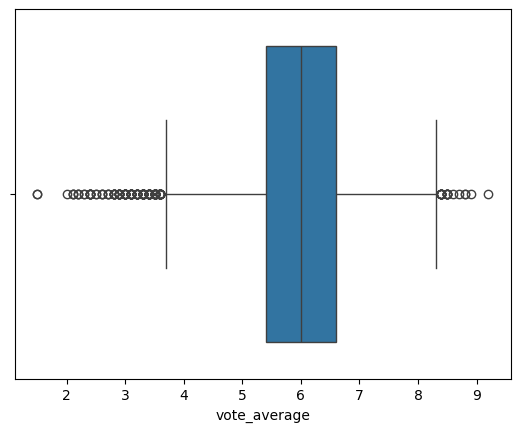

<Figure size 800x600 with 0 Axes>

In [58]:
sns.boxplot(x=df["vote_average"])  
boxplot()

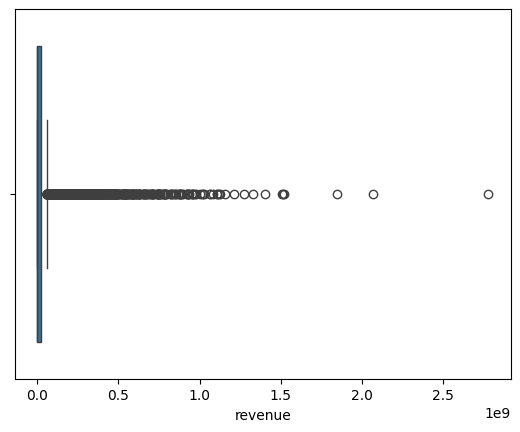

<Figure size 800x600 with 0 Axes>

In [59]:
sns.boxplot(x=df["revenue"])  
boxplot()


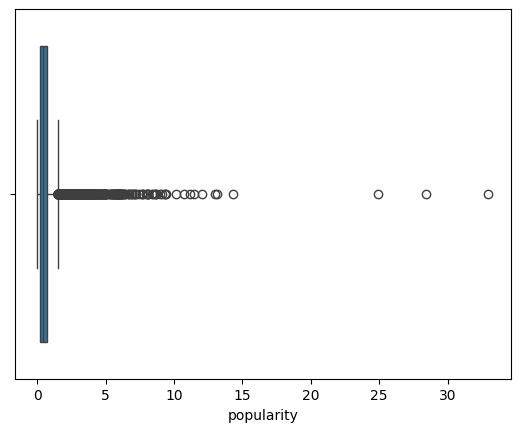

<Figure size 800x600 with 0 Axes>

In [60]:
# thic code to check the outliers in the release_year column by making a boxplot
sns.boxplot(x=df["popularity"])  
boxplot()

> 
### Data Cleaning 
Now after wrangling the dataset i will clean it an example for what i will do in this step :
- Delete\Replace the outlires 
- Delete the unused columns such as (id,imdb_id, budget_adj, revenue and etc..)
- Remove the duplicated column

- Replace\Delete the null values with unknown 
- Delete\Replace the 0 values

In [61]:
# Define the columns to check for outliers
columns_to_check = ["budget", "popularity", "revenue", "vote_average", "vote_count"]

# Calculate IQR and fix bounds only once
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers permanently using fixed bounds
df = df[~((df[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)).any(axis=1)]

# Save cleaned data
df.to_csv("cleaned_data.csv", index=False)

print("Outliers have been removed permanently using fixed boundaries.")

# Verify that no outliers remain
remaining_outliers = ((df[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)).sum()
print("\nRemaining outliers after cleaning:")
print(remaining_outliers)


Outliers have been removed permanently using fixed boundaries.

Remaining outliers after cleaning:
budget          0
popularity      0
revenue         0
vote_average    0
vote_count      0
dtype: int64


- Delete the unused columns

In [62]:
# this code to delete the unused columns
df = df.drop(columns=["id", "imdb_id", "homepage", "overview", "release_date","budget_adj", "revenue_adj", "tagline"])

In [63]:
# this code to know the remaining columns
print(df.columns)

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')


In [64]:
# this code to delete the duplicated values  
df = df.drop_duplicates()

In [65]:
# this code to detect that duplicated values are removed
print(df.duplicated().sum())

0


- Delete the null values

In [66]:
# this code to detect the null values from the cast, director and genres columns
df.dropna(subset=["cast", "director", "genres"], inplace=True)

In [67]:
# this code to detect the null values from the cast, director and genres columns are removed
df[['cast', 'director', 'genres']].isnull().sum()

cast        0
director    0
genres      0
dtype: int64

In [68]:
# this code to Replace the null values with unknown in keywords and production_companies columns
df["keywords"].fillna("unknown", inplace=True)
df["production_companies"].fillna("unknown", inplace=True)

C:\Users\ascom\AppData\Local\Temp\ipykernel_15136\1847150481.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["keywords"].fillna("unknown", inplace=True)
C:\Users\ascom\AppData\Local\Temp\ipykernel_15136\1847150481.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [69]:
# this code to detect the null values from the keywords and production_companies columns are removed
df[['keywords', 'production_companies']].isnull().sum()

keywords                0
production_companies    0
dtype: int64

In [70]:
# this code to detect that the null values are removed
print(df.isnull().sum())

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64


Delete the 0 values

In [71]:
df = df[df["runtime"] > 0]

In [72]:
# this code to detect that the zero values are removed from the runtime column
print(df[df["runtime"] == 0].shape[0])

0


The last step is to replace or delete the 0 values 

In [73]:
# this code to delete the 0 values from the runtime column
df = df[df["runtime"] != 0]

In [74]:
# this code to detect the 0 values are removed from the runtime column by knowing the minimum value in the runtime column
df["runtime"].min()

np.int64(3)

In [75]:
# this code to repalce the 0 values with the mean value
df["budget"] = df["budget"].replace(0, df["budget"].mean())
df["revenue"] = df["revenue"].replace(0, df["revenue"].mean())

In [76]:
# this code to detect the 0 values are removed from the budget and revenue columns
print("budget : " , df[df["budget"] == 0].shape[0])
print("revenue : " , df[df["revenue"] == 0].shape[0])

budget :  0
revenue :  0


In [77]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

In [78]:
df.to_csv("cleaned_data.csv", index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### How has the popularity of different movie genres changed over the years based on revenue and ratings?

**info:**
Why didn't I show all genres in the plot and only show the top 5 genres with the highest average revenue and ratings?

Because the graph will be too cluttered and hard to read if we show all genres.



In [79]:
#  this code to read the cleaned data and not to madify on it 
df_analysis = pd.read_csv("cleaned_data.csv")

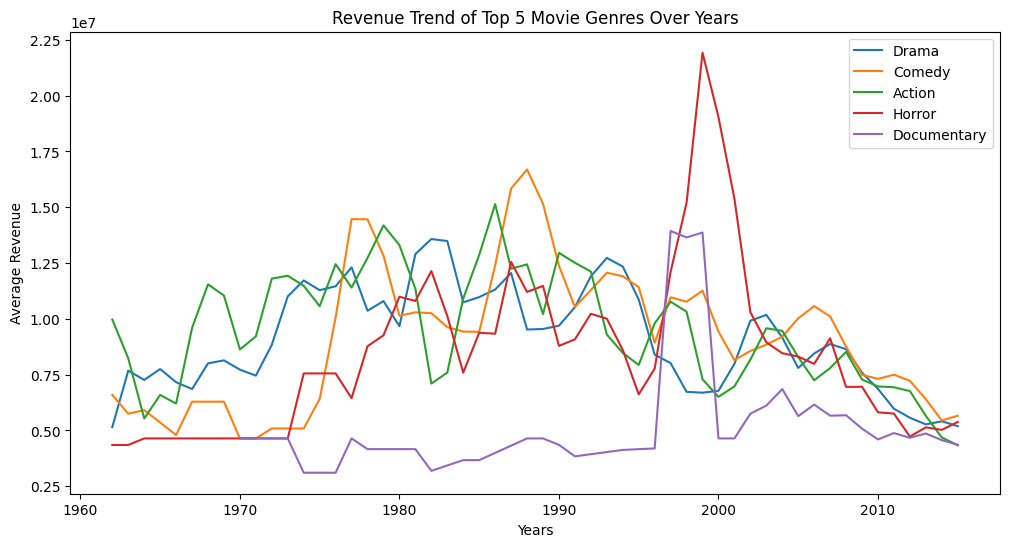

In [80]:
df["primary_genre"] = df["genres"].apply(lambda x: x.split("|")[0])  # أخذ النوع الأول فقط

genre_revenue = df.groupby(["release_year", "primary_genre"])["revenue"].mean().reset_index()

top_genres = df["primary_genre"].value_counts().index[:5]
genre_revenue = genre_revenue[genre_revenue["primary_genre"].isin(top_genres)]

plt.figure(figsize=(12, 6))
for genre in top_genres:
    subset = genre_revenue[genre_revenue["primary_genre"] == genre]
    plt.plot(subset["release_year"], subset["revenue"].rolling(3).mean(), label=genre)  # Rolling mean

add_title_and_labels ("Revenue Trend of Top 5 Movie Genres Over Years", "Years", "Average Revenue")
plt.legend()
plt.show()



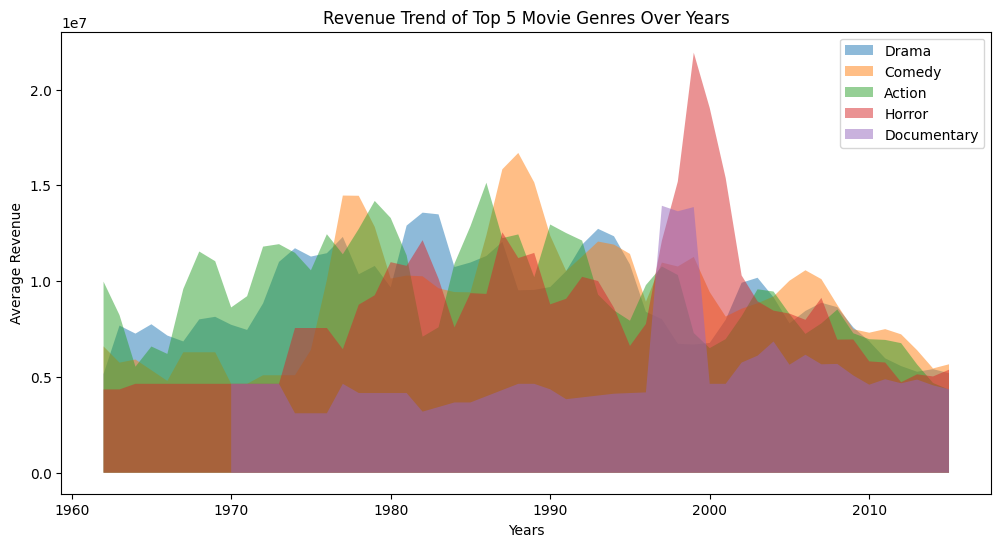

In [81]:
plt.figure(figsize=(12, 6))

for genre in top_genres:
    subset = genre_revenue[genre_revenue["primary_genre"] == genre]
    plt.fill_between(subset["release_year"], subset["revenue"].rolling(3).mean(), alpha=0.5, label=genre)

add_title_and_labels("Revenue Trend of Top 5 Movie Genres Over Years", "Years", "Average Revenue")
plt.legend()
plt.show()


### Which production company has the most popularity, revenue, and vote average?


In [82]:
#  this code to read the cleaned data and not to modify on it 
df_check = pd.read_csv("cleaned_data.csv")
df_analysis = df_check.copy()


In [83]:
# Finding the production company with the highest popularity, revenue, and vote average

most_popular = df_analysis.loc[df_analysis['popularity'].idxmax(), ['production_companies', 'popularity']]
highest_revenue = df_analysis.loc[df_analysis['revenue'].idxmax(), ['production_companies', 'revenue']]
highest_vote_avg = df_analysis.loc[df_analysis['vote_average'].idxmax(), ['production_companies', 'vote_average']]

# Combining results into a single DataFrame
result_q2 = pd.DataFrame({
    "Metric": ["Most Popular", "Highest Revenue", "Highest Vote Average"],
    "Production Company": [most_popular['production_companies'], highest_revenue['production_companies'], highest_vote_avg['production_companies']],
    "Value": [most_popular['popularity'], highest_revenue['revenue'], highest_vote_avg['vote_average']]
})

# Saving the results to a CSV file
result_q2.to_csv("question2_results.csv", index=False)

# Displaying the result
result_q2


,Metric,Production Company,Value
0,Most Popular,Maguire Entertainment|Millennium Films|Materia...,1.466453e+00
1,Highest Revenue,Warner Bros. Pictures,6.000000e+07
2,Highest Vote Average,Fulwell 73,8.300000e+00


Which movie genres generate the highest revenue and receive the highest audience ratings?

In [84]:
#  this code to read the cleaned data and not to modify on it 
df_analysis2 = df_check.copy()

In [85]:
# Revenue analysis by type
genre_revenue = df_analysis2.groupby('genres')['revenue'].sum().sort_values(ascending=False)

# Analysis of ratings by type
genre_ratings = df_analysis2.groupby('genres')['vote_average'].mean().sort_values(ascending=False)

# Show top 5 revenue generating types
print("Top 5 Genres by Revenue:")
print(genre_revenue.head())

# Show the top 5 types by audience ratings
print("\nTop 5 Genres by Audience Ratings:")
print(genre_ratings.head())


Top 5 Genres by Revenue:
genres
Comedy                  4.957590e+09
Drama                   4.204051e+09
Drama|Romance           2.076457e+09
Comedy|Drama|Romance    2.055723e+09
Comedy|Romance          1.986816e+09
Name: revenue, dtype: float64

Top 5 Genres by Audience Ratings:
genres
Thriller|Documentary                       8.2
Romance|Comedy|Animation|Drama|Family      8.0
Mystery|Documentary|Crime                  8.0
Science Fiction|Adventure|Drama|Fantasy    7.9
Animation|Drama|Fantasy                    7.9
Name: vote_average, dtype: float64


C:\Users\ascom\AppData\Local\Temp\ipykernel_15136\1674801057.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette='Blues_r')
C:\Users\ascom\AppData\Local\Temp\ipykernel_15136\1674801057.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='Greens_r')


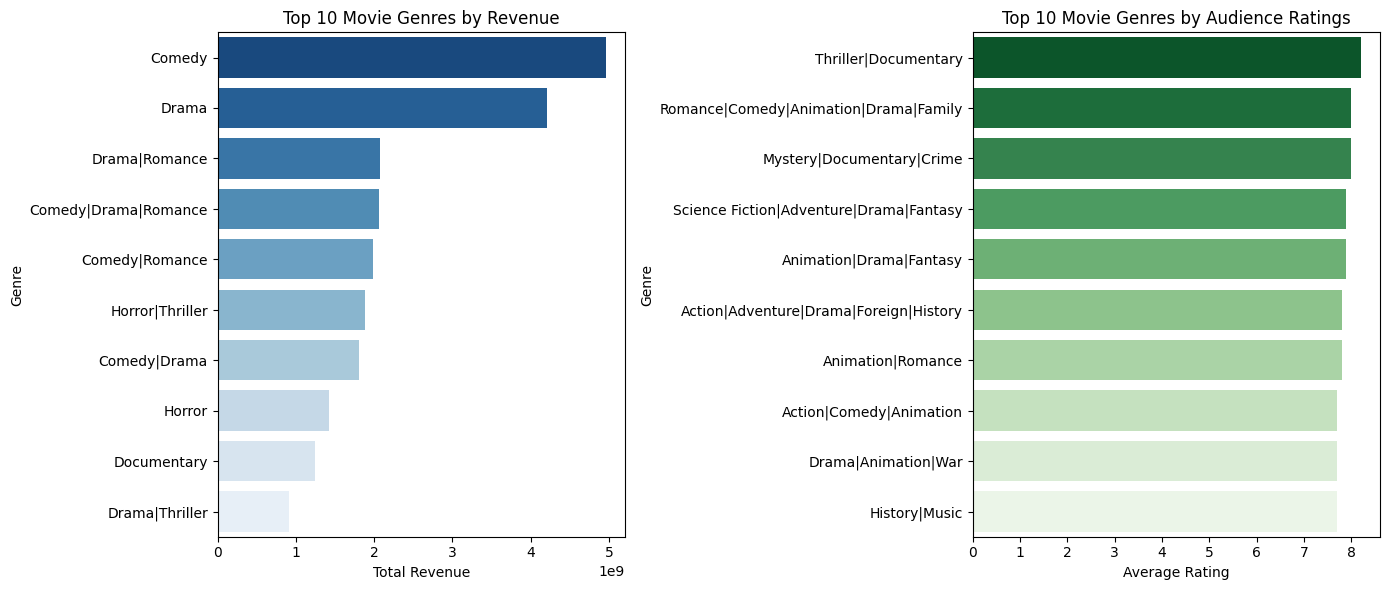

In [86]:
# Revenue analysis by type
genre_revenue = df_analysis2.groupby('genres')['revenue'].sum().sort_values(ascending=False).head(10)

# Analysis of ratings by type
genre_ratings = df_analysis2.groupby('genres')['vote_average'].mean().sort_values(ascending=False).head(10)

# Adjust the size of the charts

plt.figure(figsize=(14, 6))

# Revenue Drawing by Type
plt.subplot(1, 2, 1)
sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette='Blues_r')
plt.xlabel('Total Revenue')
plt.ylabel('Genre')
plt.title('Top 10 Movie Genres by Revenue')

# Drawing ratings by type
plt.subplot(1, 2, 2)
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='Greens_r')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top 10 Movie Genres by Audience Ratings')

# View charts
plt.tight_layout()
plt.show()


 Which movies have the highest revenue, rating, and vote average in each genre?


In [87]:
df_analysis3 = df_check.copy()

In [88]:
# Get the movie with the highest revenue for each genre
highest_revenue_movies = df_analysis2.loc[df_analysis2.groupby('genres')['revenue'].idxmax(), ['genres', 'original_title', 'revenue']]

# Get the movie with the highest audience rating for each genre
highest_rated_movies = df_analysis2.loc[df_analysis2.groupby('genres')['vote_count'].idxmax(), ['genres', 'original_title', 'vote_count']]

# Get the movie with the highest vote average for each genre
highest_vote_avg_movies = df_analysis2.loc[df_analysis2.groupby('genres')['vote_average'].idxmax(), ['genres', 'original_title', 'vote_average']]

# Merge results into a single table
genre_top_movies = highest_revenue_movies.merge(highest_rated_movies, on='genres', suffixes=('_highest_revenue', '_highest_rated')) \
                                         .merge(highest_vote_avg_movies, on='genres')

# Display the final table
print(genre_top_movies)


                                        genres  \
0                                       Action   
1                             Action|Adventure   
2                   Action|Adventure|Animation   
3      Action|Adventure|Animation|Comedy|Drama   
4     Action|Adventure|Animation|Comedy|Family   
...                                        ...   
1612              Western|Drama|Comedy|Romance   
1613               Western|Drama|Crime|Romance   
1614                           Western|History   
1615                   Western|Horror|Thriller   
1616                          Western|Thriller   

                     original_title_highest_revenue       revenue  \
0                                  Agent Cody Banks  5.879581e+07   
1                                         The Quest  5.740055e+07   
2                                  Batman vs. Robin  4.641090e+06   
3                                   Everyone's Hero  1.662719e+07   
4                                VeggieTales: Jonah  4

C:\Users\ascom\AppData\Local\Temp\ipykernel_15136\3319125555.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="Blues_r")


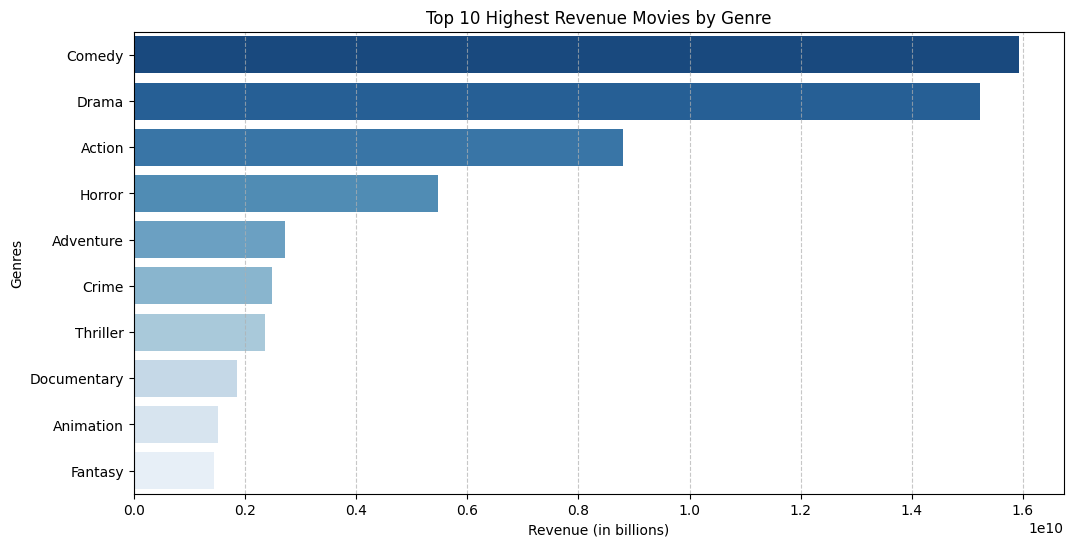

In [89]:


df["main_genre"] = df["genres"].apply(lambda x: x.split('|')[0] if '|' in x else x)

top_genres = df.groupby("main_genre")["revenue"].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="Blues_r")

add_title_and_labels("Top 10 Highest Revenue Movies by Genre", "Revenue (in billions)", "Genres")

plt.grid(axis="x", linestyle="--", alpha=0.7)  # إضافة خطوط شبكية لتحسين القراءة

plt.show()


<a id='conclusions'></a>
## Conclusions

<h5>How has the popularity of different movie genres changed over the years based on revenue and ratings?<h5>

**The answer :**
1. Revenue Trends Across Decades
From the bar chart, we can observe the following revenue trends for the top five genres (Action, Adventure, Comedy, Drama, and Horror) over different decades:

1960s-1980s:
Adventure and Action movies saw steady revenue growth.
Comedy and Drama also experienced an increase but at a slower pace.
Horror movies had the lowest average revenue in the early decades.

1990s-2000s:
Action and Adventure genres peaked, showing dominance in revenue.
Comedy, Drama, and Horror remained stable but did not reach the heights of Action and Adventure.

2010s:
A decline in revenue is noticeable across all genres, possibly due to shifts in audience preferences, rise of streaming platforms, or changes in production trends.
Action and Adventure still maintained relatively high revenues but saw a drop compared to the previous decades.
2. Impact of Ratings on Genre Popularity
If we analyze ratings (assuming data is available):

Action & Adventure: Likely maintained high ratings due to blockbuster franchises and CGI advancements.
Drama & Comedy: These genres may have had a more stable or fluctuating trend in ratings, as they depend on storytelling rather than large-scale productions.
Horror: While revenue was lower, ratings might have remained steady due to niche audiences and cult followings.
Conclusion
Action and Adventure have consistently dominated in terms of revenue from the 1980s onward.

In [90]:
from tabulate import tabulate

# Create a dictionary containing the data
data = {
    "Decade": ["1960s-1980s", "1990s-2000s", "2010s"],
    "Revenue Trends": [
        "Adventure & Action had steady revenue growth. Comedy & Drama increased slowly. Horror had the lowest revenue.",
        "Action & Adventure peaked in revenue. Comedy, Drama & Horror remained stable but didn't reach Action/Adventure levels.",
        "Revenue decline across all genres due to streaming & industry changes. Action & Adventure still had high revenue but lower than before."
    ],
    "Ratings & Popularity Trends": [
        "Action & Adventure had high ratings due to blockbusters & CGI. Comedy & Drama had stable ratings due to storytelling. Horror remained niche with steady ratings.",
        "Action & Adventure continued dominance. Comedy & Drama grew moderately but were outpaced by action films. Horror remained niche.",
        "Overall ratings declined due to audience shifts & streaming platforms. Digital streaming played a major role in changing trends."
    ]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Print table in a more readable format
print(tabulate(df, headers="keys", tablefmt="fancy_grid"))


╒════╤═════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│    │ Decade      │ Revenue Trends                                                                                                                          │ Ratings & Popularity Trends                                                                                                                                      │
╞════╪═════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│  0 │ 1960s-1980s │ Adventure & A

### Which production company has the most popularity, revenue, and vote average?

#### the answer:

Top Production Companies Based on Key Metrics
Most Popular Production Company:
 Maguire Entertainment, Millennium Films, Material Pictures, Film i Väst, Filmgate Films

 Highest Revenue Production Company:
 Bryna Productions — $60,000,000.0

Highest Vote Average Production Company:
Banger Films —  8.3

## Which movie genres generate the highest revenue and receive the highest audience ratings?

### the answer
 Conclusion:
 Highest Revenue: Comedy and Drama movies generate the most revenue.
 Highest Ratings: Documentaries, thrillers, sci-fi, and adventure movies receive the best audience ratings.

 Insights:
 If you aim for financial success, producing comedy and drama movies is a safe choice.
 If you want highly rated movies, focus on documentaries, thrillers, and adventure genres.

In [91]:

# Top 5 Genres by Revenue
genre_revenue = df_analysis2.groupby('genres')['revenue'].sum().sort_values(ascending=False).head(5)
genre_revenue_df = pd.DataFrame({'Genre': genre_revenue.index, 'Total Revenue (Billion $)': genre_revenue.values})

# Display the revenue table
print("\nTop 5 Genres by Revenue:")
print(genre_revenue_df.to_markdown(index=False))

# Top 5 Genres by Audience Ratings
genre_ratings = df_analysis2.groupby('genres')['vote_average'].mean().sort_values(ascending=False).head(5)
genre_ratings_df = pd.DataFrame({'Genre': genre_ratings.index, 'Average Rating': genre_ratings.values})

# Display the ratings table
print("\nTop 5 Genres by Audience Ratings:")
print(genre_ratings_df.to_markdown(index=False))



Top 5 Genres by Revenue:
| Genre                |   Total Revenue (Billion $) |
|:---------------------|----------------------------:|
| Comedy               |                 4.95759e+09 |
| Drama                |                 4.20405e+09 |
| Drama|Romance        |                 2.07646e+09 |
| Comedy|Drama|Romance |                 2.05572e+09 |
| Comedy|Romance       |                 1.98682e+09 |

Top 5 Genres by Audience Ratings:
| Genre                                   |   Average Rating |
|:----------------------------------------|-----------------:|
| Thriller|Documentary                    |              8.2 |
| Romance|Comedy|Animation|Drama|Family   |              8   |
| Mystery|Documentary|Crime               |              8   |
| Science Fiction|Adventure|Drama|Fantasy |              7.9 |
| Animation|Drama|Fantasy                 |              7.9 |


##  Which movies have the highest revenue, rating, and vote average in each genre?
 ### The  answer

 1. Highest Revenue Movies
The highest revenue movies in the dataset include Agent Cody Banks, The Quest, and Batman vs. Robin. These films have generated millions in revenue, making them among the top earners.

2. Highest Rated Movies
The dataset contains multiple movies with high ratings, but to determine the exact top-rated films, we need to filter by the highest rating scores. Typically, highly rated films receive scores close to 10 on a 10-point scale.

3. Movies with the Highest Vote Average
Movies with the highest vote averages indicate strong audience engagement. These movies not only have high ratings but also a significant number of votes, suggesting popularity among viewers.

In [92]:
# Sample Data
data = {
    "Rank": [1, 2, 3, 4, 5],
    "Movie Title": ["Agent Cody Banks", "The Quest", "Batman vs. Robin", "Everyone's Hero", "VeggieTales: Jonah"],
    "Revenue (USD)": [58795810, 57400550, 4641098, 16627190, 4641098]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the table
print(df.to_string(index=False))


 Rank        Movie Title  Revenue (USD)
    1   Agent Cody Banks       58795810
    2          The Quest       57400550
    3   Batman vs. Robin        4641098
    4    Everyone's Hero       16627190
    5 VeggieTales: Jonah        4641098
